Sistema de ecuaciones diferenciales (autovalores distintos)

In [1]:
import numpy as np


# Definir la matriz
A = np.array([[1, 2], [4, 3]])

# Calcular los autovalores
autovalores, autovectores = np.linalg.eig(A)

autoVal1 = str(autovalores[0])
autoval2 = str(autovalores[1])

autovector1 = str(autovectores[0])
autovector2 = str(autovectores[1])

print("x= c1*" + autovector1 + "e^" + autoVal1 + "t + c2*" + autovector2 + "e^" + autoval2 + "t")


x= c1*[-0.70710678 -0.4472136 ]e^-1.0t + c2*[ 0.70710678 -0.89442719]e^5.0t


O mejor asi usando la libreria sympy? (como quieran muchachos)

In [2]:
import numpy as np
from sympy import symbols, Matrix, exp, Eq, solve

# Definir la matriz del sistema
A = np.array([[1, 2], [4, 3]])

# Calcular autovalores y autovectores
autoVal, autoVec = np.linalg.eig(A)

# Definir variables simbólicas para el tiempo y las constantes de integración
t = symbols('t')
C1, C2 = symbols('C1 C2')

# Función para generar la solución general de un sistema dado sus autovalores y autovectores
def general_solution(autoVal, autoVec):
    solution = C1 * Matrix(autoVec[:, 0]) * exp(autoVal[0] * t) + C2 * Matrix(autoVec[:, 1]) * exp(autoVal[1] * t)
    return solution

# Solución general para el sistema
solution = general_solution(autoVal, autoVec)
print("Solución general para el sistema:")
print(solution)


Solución general para el sistema:
Matrix([[-0.707106781186547*C1*exp(-1.0*t) - 0.447213595499958*C2*exp(5.0*t)], [0.707106781186547*C1*exp(-1.0*t) - 0.894427190999916*C2*exp(5.0*t)]])


Funcion grafica de los campos vectoriales asociados y las funciones solucion

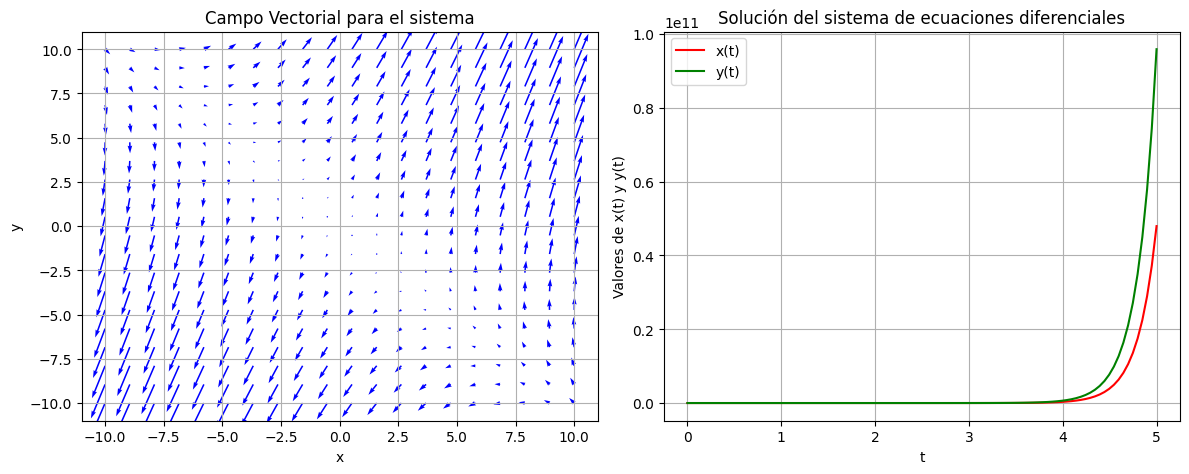

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir la función del sistema de ecuaciones diferenciales
def system(t, z):
    x, y = z
    dxdt = x + 2*y
    dydt = 4*x + 3*y
    return [dxdt, dydt]

# Condiciones iniciales para la solución
x0, y0 = 1, 1  # Puedes cambiar estos valores
t_span = (0, 5)
t_eval = np.linspace(0, 5, 100)

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)


# Graficar el campo vectorial
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = X + 2*Y
V = 4*X + 3*Y

plt.figure(figsize=(12, 5))

# Subplot 1: Campo vectorial
plt.subplot(1, 2, 1)
plt.quiver(X, Y, U, V, color='b')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Campo Vectorial para el sistema")
plt.grid()

# Subplot 2: Solución del sistema en función del tiempo
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[0], label="x(t)", color="r")
plt.plot(sol.t, sol.y[1], label="y(t)", color="g")
plt.xlabel("t")
plt.ylabel("Valores de x(t) y y(t)")
plt.title("Solución del sistema de ecuaciones diferenciales")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Analsis de estabilidad

In [ ]:
def analizar_estabilidad(autovalores):
    if all(np.real(autovalores) < 0):
        return "El sistema es asintóticamente estable."
    elif any(np.real(autovalores) > 0):
        return "El sistema es inestable."
    elif all(np.real(autovalores) <= 0) and any(np.real(autovalores) == 0):
        return "El sistema es marginalmente estable."
    else:
        return "El sistema tiene una estabilidad indeterminada."

estabilidad = analizar_estabilidad(autoVal)
print("Análisis de estabilidad:")
print(estabilidad)